# Аналитика параметров спортсменов с помощью методов Big Data

In [1165]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz

import warnings

In [1166]:
warnings.simplefilter(action='ignore', category=FutureWarning) 

### Подгружаем датасет профессиональных спортсменов и обрабатываем

In [1167]:
FILE_PATH = './player_stats.csv'

df = pd.read_csv(FILE_PATH) # encoding='ISO-8859-1'

df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas Dähne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Sadio Man�,Senegal,174,69,31,FC Bayern M�nchen,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000


In [1168]:
df.columns

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

#### Описание столбцов

|Наименование столбца        |Описание                                      |
|:--------------------------|:----------------------------------------------|
|`player`                    | Имя игрока                                   |
|`country`                   | Страна игрока                                |
|`height`                    | Рост в см                                    |
|`weight`                    | Вес в кг                                     |
|`age`                       | Возраст                                      |
|`club`                      | Клуб за который играет                       |
|`ball_control`              | Умение владения мяча                         |
|`dribbling`                 | Способность к дриблингу                      |
|`marking`                   | Способность отмечать соперника *(заметить)*  |
|`slide_tackle`              | Способность выполнять скользящий подкат      |
|`stand_tackle`              | Способность выполнять подкат стоя            |
|`aggression`                | Уровень агрессии                             |
|`reactions`                 | Время реакции игрока                         |
|`att_position`              | Позиция для атакующих действий               |
|`interceptions`             | Умение перехватывать передачи                |
|`vision`                    | Уровень видения игрока на поле               |
|`composure`                 | Уровень хладнокровия *(в момент давления)*   |
|`crossing`                  | Способность выполнять кроссы                 |
|`short_pass`                | Точность коротких передач                    |
|`long_pass`                 | Точность дальних передач                     |
|`acceleration`              | Ускорение                                    |
|`stamina`                   | Уровень выносливости                         |
|`strength`                  | Физическая сила                              |
|`balance`                   | Равновесие игрока                            |
|`sprint_speed`              | Скорость спринта                             |
|`agility`                   | Ловкость в маневрировании                    |
|`jumping`                   | Способность к прыжкам                        |
|`heading`                   | Уровень владения мячом головной игрой        |
|`shot_power`                | Сила удара                                   |
|`finishing`                 | Навык в завершении *(решить)*                |
|`long_shots`                | Навык наносить дальние удары                 |
|`curve`                     | Способность отправлять мяч по кривой         |
|`fk_acc`                    | Точность штрафного удара                     |
|`penalties`                 | Навык исполнения пенальти                    |
|`volleys`                   | Навык при выполнении залпового удара         |
|`gk_positioning`            | Атрибут расположения вратаря **(специфично для вратаря)**                  |
|`gk_diving`                 | Способность к прыжкам вратаря **(специфично для вратаря)**                 |
|`gk_handling`               | Умение вратаря обращаться с мячом **(специфично для вратаря)**             |
|`gk_kicking`                | Способность вратаря наносить удары **(специфично для вратаря)**            |
|`gk_reflexes`               | Уровень рефлексов вратаря **(специфично для вратаря)**                     |
|`value`                     | Ценность/стоимость игрока *($)*                                            |

### Этап EDA

In [1169]:
df.shape

(5682, 41)

In [1170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [1171]:
df.drop_duplicates(inplace=True)

In [1172]:
def player_value_to_num(value):
    return value.replace('.', '')[1:]

# Заметим, что поле value (стоимость игрока) имеет тип object, а примерное значение - $1.400.000
# Нужно перевести в число
df['value'] = pd.to_numeric(df['value'].apply(lambda v: player_value_to_num(v)))
df['player'] = df['player'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # Исправляем некоторые ошибки кодировки

In [1173]:
df.isna().mean()*100

player              0.0
country             0.0
height              0.0
weight              0.0
age                 0.0
club                0.0
ball_control        0.0
dribbling           0.0
marking           100.0
slide_tackle        0.0
stand_tackle        0.0
aggression          0.0
reactions           0.0
att_position        0.0
interceptions       0.0
vision              0.0
composure           0.0
crossing            0.0
short_pass          0.0
long_pass           0.0
acceleration        0.0
stamina             0.0
strength            0.0
balance             0.0
sprint_speed        0.0
agility             0.0
jumping             0.0
heading             0.0
shot_power          0.0
finishing           0.0
long_shots          0.0
curve               0.0
fk_acc              0.0
penalties           0.0
volleys             0.0
gk_positioning      0.0
gk_diving           0.0
gk_handling         0.0
gk_kicking          0.0
gk_reflexes         0.0
value               0.0
dtype: float64

In [1174]:
df.drop('marking', axis=1, inplace=True) # Все записи пропуски

Проводя аналитику, заметил, что даже после `drop_duplicates` остались некоторые значения - дубликаты. Из-за того, что исходный `csv` датасет имел проблемы с кодировкой, при загрузке его в python некоторые значения имеют, а именно категориальные (строки), битые символы, поэтому дефолтный метод не замечает такие значения.

Для этого я решил провести сравнение по именам. Первая идея была пройтись 2'мя циклами: первый цикл (`i`) по всем игрокам, а второй (`j`) - сравнивает i'го игрока с каждым j'м из всех игроков, однако для 5600+ записей такой алгоритм работал бы очень долго, к тому же это только 2 прохода только для сопоставления спортсменов, а еще есть сама проверка на дубликат.  

Поэтому я решил отсортировать датафрейм по именам, в таком случае, можно пройтись за один цикл (`i`), сравнивая `i`'го игрока с предыдущем `i-1`. Это колоссально ускорило процесс.

In [1175]:
df.sort_values(by='player', inplace=True)

In [1176]:
SUSPECT_PERCENTAGE = 90 # Процент совпадения, при котором считаем, что имена одинаковые

features_for_check = ['height', 'weight', 'age'] # Фичи, которые проверяем на совпадение. (Лучше всего выбрать числовые, поскольку в категориальных снова может быть пропущенный или сломанный символ) 
suspect_players = [] # Список спортсменов, подозреваемых на совпадение

for i in range(df.shape[0]):
    if i != 0: # Для индекса 0 нет игрока для сравнения
        player = df.iloc[i]
        prev_player = df.iloc[i - 1]
        
        # fuzz.ratio возвращает процент совпадения 2 слов
        if fuzz.ratio(player['player'], prev_player['player']) >= SUSPECT_PERCENTAGE:
            flag = True # Флаг того, что остальные фичи, выбранные выше, одинаковые
            
            for feature in features_for_check:
                if player[feature] != prev_player[feature]:
                    flag = False
                    
            if flag:
                # Выбранные фичи совпали у двух игроков с +- одинаковыми именами
                suspect_players.append(player)
                suspect_players.append(prev_player)

df_suspect = pd.DataFrame(data=suspect_players, columns=df.columns)

df_suspect

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5229,Kylian Mbappe,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000
5675,Kylian Mbapp,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000
916,Sadio Mane,Senegal,174,69,31,FC Bayern München,86,88,38,42,...,77,64,75,75,7,10,10,15,14,101000000
5678,Sadio Man,Senegal,174,69,31,FC Bayern M�nchen,86,88,38,42,...,77,64,75,75,7,10,10,15,14,101000000


In [1177]:
# В нашем случае, каждый нечетный элемент - дубликат
# Дропаем такие индексы
df.drop(df_suspect.index[::2], inplace=True)

In [1178]:
df.shape

(5677, 40)

In [1179]:
df.describe().T.apply(lambda v: v.apply('{0:.3f}'.format)) # Применяем формат до 3 знаков после запятой

,count,mean,std,min,25%,50%,75%,max
height,5677.000,181.671,6.831,156.000,177.000,182.000,186.000,204.000
weight,5677.000,75.280,6.998,54.000,70.000,75.000,80.000,102.000
age,5677.000,26.315,4.731,17.000,23.000,26.000,30.000,41.000
ball_control,5677.000,58.906,16.564,8.000,55.000,63.000,69.000,94.000
dribbling,5677.000,56.125,18.762,5.000,51.000,62.000,68.000,95.000
slide_tackle,5677.000,46.733,20.522,7.000,27.000,54.000,64.000,87.000
stand_tackle,5677.000,48.825,20.977,7.000,30.000,57.000,66.000,91.000
aggression,5677.000,56.320,16.848,11.000,45.000,60.000,69.000,96.000
reactions,5677.000,61.948,8.876,32.000,56.000,62.000,68.000,93.000
att_position,5677.000,50.722,19.766,3.000,40.000,56.000,65.000,93.000


In [1180]:
df_nums = df.copy() # копия исходного датафрейма, состоящая только из числовых значений 

# Категориальные
df_nums.drop('player', axis=1, inplace=True)
df_nums.drop('club', axis=1, inplace=True)
df_nums.drop('country', axis=1, inplace=True)

#### Проверять датасет на аномалии не будем, поскольку все данные - параметры спортсменов, характеризующие их показатели. Например, сам человек может быть аномально быстрым или сильным, тогда это будет ошибкой, если не учитывать его при анализе    

In [1181]:
corr = df_nums.corr()

corr.style.background_gradient(cmap='coolwarm')

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
height,1.000000,0.758452,0.078034,-0.410939,-0.488867,-0.127568,-0.124798,-0.092803,-0.005251,-0.443760,-0.111848,-0.364856,-0.189341,-0.516866,-0.348881,-0.321141,-0.551729,-0.307200,0.528669,-0.768083,-0.452784,-0.645511,0.038659,0.000904,-0.171490,-0.381026,-0.391524,-0.469221,-0.424074,-0.325895,-0.354625,0.361445,0.368740,0.367468,0.363198,0.370114,-0.012402
weight,0.758452,1.000000,0.214852,-0.334601,-0.404751,-0.108088,-0.103369,-0.017635,0.082822,-0.352951,-0.081514,-0.281771,-0.091690,-0.414379,-0.274063,-0.249071,-0.474031,-0.234437,0.592166,-0.634341,-0.387843,-0.543502,0.107938,0.030847,-0.075407,-0.302237,-0.294583,-0.375049,-0.326947,-0.239114,-0.264614,0.330747,0.334210,0.333060,0.330923,0.335535,0.011917
age,0.078034,0.214852,1.000000,0.091776,0.036789,0.089902,0.102434,0.240001,0.407861,0.106821,0.171370,0.200672,0.357021,0.130756,0.141933,0.185420,-0.135253,0.127103,0.349128,-0.046580,-0.124356,-0.017592,0.240980,0.159252,0.273719,0.094778,0.166332,0.147261,0.185161,0.160509,0.155407,0.101491,0.087737,0.095151,0.093466,0.093885,0.083175
ball_control,-0.410939,-0.334601,0.091776,1.000000,0.946841,0.448081,0.482045,0.614942,0.477139,0.875203,0.473761,0.709081,0.761325,0.841688,0.925990,0.809814,0.700425,0.752035,0.130122,0.641343,0.683457,0.716619,0.222804,0.708424,0.609859,0.809857,0.837918,0.838948,0.772743,0.781390,0.799851,-0.800737,-0.808221,-0.806539,-0.800059,-0.806693,0.280423
dribbling,-0.488867,-0.404751,0.036789,0.946841,1.000000,0.352937,0.383454,0.522147,0.407094,0.913719,0.372160,0.729854,0.700813,0.869973,0.859372,0.744662,0.759408,0.716478,0.017133,0.694680,0.731465,0.778191,0.153587,0.610150,0.614166,0.845995,0.855344,0.862253,0.783588,0.785085,0.818396,-0.775580,-0.781897,-0.780113,-0.776966,-0.781474,0.254486
slide_tackle,-0.127568,-0.108088,0.089902,0.448081,0.352937,1.000000,0.977908,0.733895,0.245770,0.196070,0.947444,0.140634,0.363501,0.449857,0.560265,0.607060,0.235247,0.587967,0.275287,0.236173,0.248617,0.191433,0.306347,0.543986,-0.020663,0.014347,0.172772,0.294409,0.253569,0.105947,0.072226,-0.547973,-0.549353,-0.547792,-0.546478,-0.547638,0.082508
stand_tackle,-0.124798,-0.103369,0.102434,0.482045,0.383454,0.977908,1.000000,0.751528,0.274453,0.233053,0.955772,0.177985,0.401067,0.470445,0.594123,0.632885,0.246943,0.609884,0.295195,0.248282,0.261207,0.210676,0.306887,0.566786,0.017273,0.055345,0.213363,0.327613,0.287124,0.143167,0.113577,-0.570217,-0.570225,-0.568941,-0.567570,-0.569158,0.102666
aggression,-0.092803,-0.017635,0.240001,0.614942,0.522147,0.733895,0.751528,1.000000,0.425701,0.453804,0.753665,0.331077,0.574799,0.509283,0.670443,0.642142,0.317550,0.679062,0.470653,0.281743,0.346990,0.302459,0.436026,0.726687,0.302799,0.324160,0.433057,0.453036,0.415978,0.388608,0.371750,-0.615031,-0.617518,-0.616383,-0.613934,-0.614380,0.189547
reactions,-0.005251,0.082822,0.407861,0.477139,0.407094,0.245770,0.274453,0.425701,1.000000,0.409726,0.330010,0.537394,0.695212,0.387128,0.536040,0.512407,0.211400,0.411304,0.335420,0.186526,0.218056,0.278767,0.300798,0.379937,0.521449,0.371797,0.430909,0.424255,0.393406,0.380493,0.408255,-0.087534,-0.097059,-0.094750,-0.093539,-0.090651,0.505350
att_position,-0.443760,-0.352951,0.106821,0.875203,0.913719,0.196070,0.233053,0.453804,0.409726,1.000000,0.233435,0.750926,0.671823,0.811523,0.778093,0.648386,0.697445,0.669794,0.043956,0.638617,0.672566,0.727080,0.144329,0.574734,0.678324,0.911581,0.888890,0.841188,0.781358,0.824455,0.866379,-0.697181,-0.706481,-0.702285,-0.698051,-0.702404,0.249680


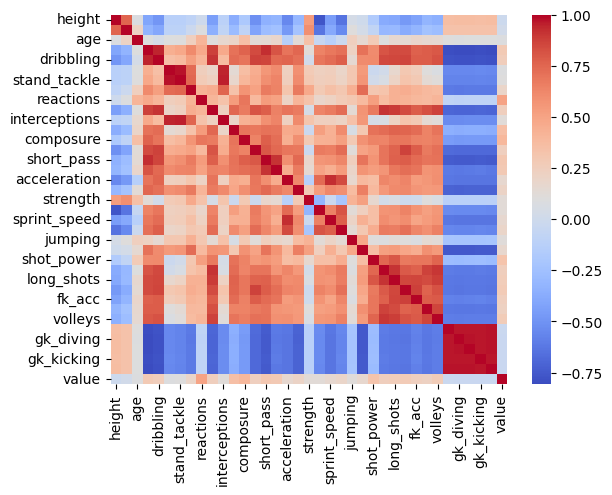

In [1182]:
sns.heatmap(corr, cmap="coolwarm")
plt.show()

#### Выделил 7 признаков, которые, по моему мнению, не имеют запредельной корреляции с остальными фичами и детально характеризуют нашего спортсмена
##### игровые характеристики
* `shot_power`
* `dribbling`
* `finishing`

##### признаки, состоящие из показателей здоровья
* `stamina`
* `sprint_speed`
* `composure`
* `reactions`

Также такие признаки, как `value` и `country` интересны 

### Аналитика 

In [1183]:
best_features = ['shot_power', 'dribbling', 'finishing', 'stamina', 'sprint_speed', 'composure', 'reactions']

In [1184]:
print(f'Всего стран: {df['country'].nunique()}')
print(f'Всего клубов: {df['club'].nunique()}')

Всего стран: 135
Всего клубов: 689


In [1185]:
TOP_RECORDS = 15 # Топ записей, которые будем отображать

#### Топ стран по количеству профессиональных спортсменов

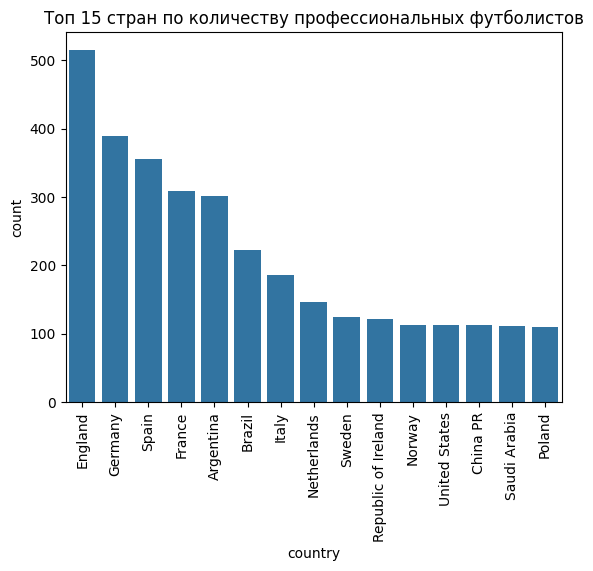

In [1186]:
sns.barplot(df['country'].value_counts().nlargest(TOP_RECORDS))
plt.title(f'Топ {TOP_RECORDS} стран по количеству профессиональных футболистов')
plt.xticks(rotation=90)
plt.show()

#### Самые дорогие и дешевые игроки, и некоторые их показатели

In [1187]:
df[['player', 'country', 'club', 'value', *best_features]].sort_values(by='value', ascending=False)

,player,country,club,value,shot_power,dribbling,finishing,stamina,sprint_speed,composure,reactions
5675,Kylian Mbapp,France,Paris SG,153500000,88,93,93,87,97,88,93
1965,Erling Haaland,Norway,Manchester City,123000000,94,78,94,81,94,86,89
4849,Kevin De Bruyne,Belgium,Manchester City,107500000,92,86,85,89,73,88,91
5678,Sadio Man,Senegal,FC Bayern M�nchen,101000000,83,88,85,85,86,84,91
5679,Neymar Jr,Brazil,Paris SG,99500000,79,95,83,79,86,93,88
...,...,...,...,...,...,...,...,...,...,...,...
2533,Enrico Guarna,Italy,Ascoli,1500,44,9,7,34,41,53,64
5565,Eldin Jakupovic,Switzerland,LAFC,1000,47,11,12,30,30,62,58
387,Scott Flinders,England,Mansfield Town,600,47,11,16,36,29,50,58
1548,Andy Lonergan,England,Everton,600,38,11,14,28,41,30,54


In [1188]:
# TODO: scatterplot | кластерный анализ | провести аналитику и составить команду мечты (по признакам)